<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/rocketPropulsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rocket Trajectory Simulation

This notebook simulates the trajectory of a rocket launched from the Earth's surface.
It considers the effects of gravity, atmospheric drag, and thrust to calculate the
rocket's altitude, velocity, and acceleration over time.

The simulation is based on fundamental physics principles, including Newton's laws of
motion and the barometric formula for atmospheric density. It provides a simplified but insightful model of rocket behavior during ascent.

**Key features:**
* Calculates the acceleration due to gravity as a function of altitude.
* Estimates atmospheric density using the barometric formula.
* Models the forces acting on the rocket (thrust, gravity, drag).
* Numerically integrates the equations of motion to determine the rocket's trajectory.
* Visualizes the results using plots of altitude vs. time.

**Potential uses:**
* Preliminary design and analysis of rocket trajectories.
* Experimentation with different rocket parameters and launch conditions.

In [5]:
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle
import numpy as np # import the "numpy" library as the "np" handle, where lots of functions live

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


Let's define a function, let's call it g, that takes an altitude y ( in meters) as input and returns the corresponding acceleration due to gravity g at that altitude in m/s^2

In [18]:
def g(y):
    gSurface=9.8  # m/s^2
    earthRadius= 6700000 # m
    g= gSurface/(1+(y/earthRadius)**2)
    return g;

In [19]:
def rho(y):
    """Calculates the atmospheric density at a given altitude.

    This function estimates the atmospheric density (rho) at a specific altitude (y)
    using the barometric formula, considering the decrease in density with
    increasing altitude due to the reduction in gravitational potential energy.

    Args:
        y (float): The altitude above the Earth's surface in meters.

    Returns:
        float: The atmospheric density (rho) at the given altitude in kg/m^3.
    """
    rhoSurface = 1.15 # kg/m^3
    molecularMass = 28*1.16*10**(-27) # molecular mass of nitrogen (kg)
    boltzmannConstant = 1.38*10**(-23) #  in J/K
    temperature = 300 # in Kelvin
    gravitationalPotentialEnergy= molecularMass*g(y)*y  # in J
    thermalEnergy = boltzmannConstant* temperature; # in J
    rho = rhoSurface*np.exp(- gravitationalPotentialEnergy/thermalEnergy)  # in kg/m^3
    return rho

In [25]:
initialRocketMass =3.2*10**(4) # in kilograms
exhaustPropellantSpeed = 1958 ## in meter per second
propellantConsumptionRate= 578 ## in kg/s
crossSection= 12.0 # in meter square
C=0.5 # dimensionless

# rockets attributes
y=0
v=0
a=0
p=0
m=initialRocketMass
mPropellant = 0.90*m

# arrays
ys=[]
vs=[]
ps=[]
ms=[]

dt=0.1 # in seconds
timeRange = np.arange(0,80,dt);

for t in timeRange:

    if (mPropellant>0):
        forceThrust= exhaustPropellantSpeed*propellantConsumptionRate
        m=m-propellantConsumptionRate*dt  # mass of rocket
        mPropellant=mPropellant-propellantConsumptionRate*dt; # mass of propellant
    else:
        forceThrust =0
    forceGravity= -m*g(y)
    forceDrag= -1/2*C*rho(y)*crossSection*v**2;

    changeInMomentum= forceThrust + forceGravity + forceDrag;
    a = changeInMomentum/m

    y= y + v*dt+ 1/2*a*dt**2
    v= v + a*dt

    ## comment out to see all the variables
    # print(f"y={y:.2f} m, v={v:.2f} m/s, a={a:.2f} m/s^2, m={m:.2f} kg, thrust={forceThrust:.2f} N, drag={forceDrag:.2f} N")
    ys.append(y)
    vs.append(v)
    ps.append(p)
    ms.append(m)

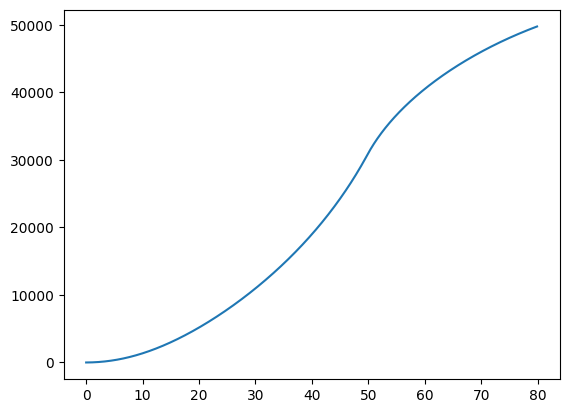

In [24]:
plt.plot(timeRange,ys)
plt.show()